# Objetivos del módulo

Conocer cómo se representan las estructuras de datos en la memoria de la máquina y las decisiones y compromisos que realizan los distintos lenguajes de progamación.

# Preguntas básicas

- ¿Cómo se hace corresponder la información de una estructura de datos a memoria de la máquina?
- ¿Qué decisiones y compromisos adquieren los distintos lenguajes y entornos de programación?
- ¿Cómo afecta esto al rendimiento de nuestros algoritmos?
- ¿Qué es una fórmula de direccionamiento?


# 1. Memoria y datos

## C: compilación

fíjate cómo editamos, compilamos y ejecutamos un pequeño programa en C desde el propio notebook.

- el magic `%%` escribe el contenido de una celda en un archivo
- el magic `!` ejecuta la línea en el shell de linux

In [5]:
%%writefile tmp/c_warmup.c
#include <stdio.h>

int main(int argc, char **argv) {
    printf("-----\n¿Qué pasó?\n-----\n");
}

Overwriting tmp/c_warmup.c


In [7]:
!make -f files/Makefile-n1.1 clean all

rm -rf *.o tmp/c_warmup /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/*.o
--------------------------------------
- bulding tmp/c_warmup
--------------------------------------
INCLUDES /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
SOURCES tmp/c_warmup.c /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/rlxutils.c
ROOT DIR /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
gcc -c -fopenmp -Wno-format -D LINUX -I/home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/rlxutils.c -o /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/rlxutils.o
gcc tmp/c_warmup.o /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/rlxutils.o -o tmp/c_warmup -fopenmp -lrt 


In [8]:
!./tmp/c_warmup

-----
¿Qué pasó?
-----


## C: memoria, contenido y punteros

Recuerda que en C tenemos acceso directo a la memoria de la máquina.

- Una variable hace referencia al contenido de una posición de memoria
- Un puntero hace referencia a una posición de memoria
- De toda variable se puede obtener un apuntador (una dirección de memoria)
- De todo apuntador se puede obtener el contenido de la memoria a la que apunta.

Los arreglos en realidad son listas de apuntadores a memoria con una aritmética de apuntadores que depende del tipo de dato al que apuntan.

Ejecuta y observa la salida del siguiente código C.

- ¿Cuál es el tamaño de cada tipo de dato?
- ¿Cambia el tamaño del apuntador a cada tipo de dato?
- ¿Con qué notación se obtiene la dirección de memoria de una variable?
- ¿Con qué notación se obtiene el contenido al que un apuntador apunta?

In [9]:
%%writefile tmp/c_pointers.c
#include <stdio.h>

int main(int argc, char **argv) {
    printf ("Sizes of data types (and pointers to)\n");
    char _char;           char *ptr_char = &_char;
    int _int;             int *ptr_int = &_int;
    short _short;         short *ptr_short = &_short;
    unsigned int _uint;   unsigned int *ptr_uint = &_uint;
    long _long;           long *ptr_long = &_long;
    unsigned long _ulong; unsigned long *ptr_ulong = &_ulong;
    float _float;         float *ptr_float = &_float;
    double _double;       double *ptr_double =&_double;
    long double _ldouble; long double *ptr_ldouble = &_ldouble;

    printf ("  char          %d, %d\n", sizeof(char), sizeof(ptr_char));
    printf ("  int           %d, %d\n", sizeof(int), sizeof(ptr_int));
    printf ("  short         %d, %d\n", sizeof(short), sizeof(ptr_short));
    printf ("  unsigned int  %d, %d\n", sizeof(unsigned int), sizeof(ptr_uint));
    printf ("  long          %d, %d\n", sizeof(long), sizeof(ptr_long));
    printf ("  unsigned long %d, %d\n", sizeof(unsigned long), sizeof(ptr_ulong));
    printf ("  float         %d, %d\n", sizeof(float), sizeof(ptr_float));
    printf ("  double        %d, %d\n", sizeof(double), sizeof(ptr_double));
    printf ("  long double   %d, %d\n", sizeof(long double), sizeof(ptr_double));
    printf ("\n");

    printf ("Usage of pointers and unsigned data\n");    
    double dn = 10.3045;
    char   cn = 10;
    float  fn = -12.34;
    long double ldn = 10432.12;

    double *ptr_dn = &dn;
    char   *ptr_cn = &cn;
    float  *ptr_fn = &fn;
    long double *ptr_ldn = &ldn;
    printf ("  value of vars         %f, %d, %f, %f\n", dn, cn, fn, ldn);
    printf ("  value of pointed vars %f, %d, %f, %f\n", *ptr_dn, *ptr_cn, *ptr_fn, *ptr_ldn);
    printf ("  value of pointers     %u, %u, %u, %u\n", ptr_dn, ptr_cn, ptr_fn, ptr_ldn);
    printf ("\n");

    printf ("Usage of arrays\n");
    int aint[3] = {9,3,902};
    double adouble[3] = {3.5,6.7,0.354};
    aint[2] = 9021;
    *(aint+1) = 21;
    printf ("   elements by number          %d %d %d %d %f %f\n", aint[0], aint[1], *(aint+1), aint[2], adouble[2], *(adouble+2));
    printf ("   int elements by pointers    %d %d %d %d\n", aint, &aint[0], &aint[1], &aint[2]);
    printf ("   double elements by pointers %u %u %u %u\n", adouble, &adouble[0], &adouble[1], &adouble[2]);
    return 0; 

}

Writing tmp/c_pointers.c


In [10]:
!make -f files/Makefile-n1.2 clean all

rm -rf *.o tmp/c_pointers /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/*.o
--------------------------------------
- bulding tmp/c_pointers
--------------------------------------
INCLUDES /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
SOURCES tmp/c_pointers.c /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/rlxutils.c
ROOT DIR /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
gcc -c -fopenmp -Wno-format -D LINUX -I/home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils tmp/c_pointers.c -o tmp/c_pointers.o
INCLUDES /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
SOURCES tmp/c_pointers.c /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/rlxutils.c
ROOT DIR /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
gcc -c -fopenmp -Wn

In [11]:
!./tmp/c_pointers

Sizes of data types (and pointers to)
  char          1, 8
  int           4, 8
  short         2, 8
  unsigned int  4, 8
  long          8, 8
  unsigned long 8, 8
  float         4, 8
  double        8, 8
  long double   16, 8

Usage of pointers and unsigned data
  value of vars         10.304500, 10, -12.340000, 14174589730046585874614168652598773188411636984113391767854718152146252292237407367583422181417722533309315031400237825744499695543379675060659417656207514436760746054142743383053503029051392.000000
  value of pointed vars 10.304500, 10, -12.340000, 0.000000
  value of pointers     3610088976, 3610088933, 3610088948, 3610089104

Usage of arrays
   elements by number          9 21 21 9021 0.354000 0.354000
   int elements by pointers    -684878172 -684878172 -684878168 -684878164
   double elements by pointers 3610089136 3610089136 3610089144 3610089152


## C: pasos por referencia y valor

Observa las funciones declaran explícitamente qué argumento es puntero y qué argumento es valor. Fíjate en especial las posiciones de memoria que cambian su contenido antes y después de llamar a la función `f`

In [14]:
%%writefile tmp/c_fcall.c
#include <stdio.h>

void f(unsigned int p1, unsigned int *p2) {
    printf ("  value and memory address of p1 %d(%d)\n", p1, &p1);
    printf ("  value and memory address of p2 %d(%d)\n", *p2, p2);

    p1 = p1*2;
    *p2 = *p2 * 2;
    printf ("  changed values p1=%u, p2=%u\n", p1, *p2);
}

int main(int argc, char **argv) {
    unsigned int i1 = 10;
    unsigned int i2 = 15;
    printf ("calling function with i1=%d (%u), i2=%u(%u)\n", i1, &i1, i2, &i2);
    f (i1, &i2);
    printf ("values after function i1=%d (%u), i2=%u(%u)\n", i1, &i1, i2, &i2);
    
}

Writing tmp/c_fcall.c


In [15]:
!make -f files/Makefile-n1.3 clean all

rm -rf *.o tmp/c_fcall /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/*.o
--------------------------------------
- bulding tmp/c_fcall
--------------------------------------
INCLUDES /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
SOURCES tmp/c_fcall.c /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/rlxutils.c
ROOT DIR /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
gcc -c -fopenmp -Wno-format -D LINUX -I/home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils tmp/c_fcall.c -o tmp/c_fcall.o
INCLUDES /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
SOURCES tmp/c_fcall.c /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/rlxutils.c
ROOT DIR /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
gcc -c -fopenmp -Wno-format -D LINUX 

In [16]:
!./tmp/c_fcall

calling function with i1=10 (2969645632), i2=15(2969645636)
  value and memory address of p1 10(-1325321700)
  value and memory address of p2 15(-1325321660)
  changed values p1=20, p2=30
values after function i1=10 (2969645632), i2=30(2969645636)


## Python: gestión de la memoria

Python realiza una gestión completa de la memoria, como en otros lenguajes (Java, etc.). No hay punteros y ciertas libererías de Python gestionan el uso de la memoria para sus estructuras. Por ejemplo `numpy` implementa muchas funciones en C y nos las ofrece con la sintaxis limpia de Python. Si usamos `numpy` podemos al menos ver las direcciones de memoria de los arrays.

Ejecuta el siguiente código y prueba con distintos tipos de datos en `dtype`: `np.int32`, `np.int64`, `np.float32`, `np.float64`


In [17]:
import numpy as np

a = np.array([1,2,3], dtype=np.float64)
print("array                    ", a)
print("tipo de datos            ", a.dtype)
print("memory positino a o a[0] ", a.ctypes.data)
print("memory position a[1]     ", a[1:].ctypes.data)
print("bytes delta de posiciones", a[1:].ctypes.data - a.ctypes.data)

array                     [1. 2. 3.]
tipo de datos             float64
memory positino a o a[0]  94072038473760
memory position a[1]      94072038473768
bytes delta de posiciones 8


En general, la función `id` da un identificador único de cualquier objeto de Python, aunque no necesariamente es su posición de memoria (depende de la implementación de tu instalación de Python). Nos sirve para ver si dos variables apuntan al mismo contenido.

In [18]:
a = 2
print(type(a), id(a))
b = a
print(type(b), id(b))

<class 'int'> 94072006972480
<class 'int'> 94072006972480


fíjate como un mismo dato puede tener varias _etiquetas_

In [19]:
xx = [1,2,3]
print(id(xx), xx)
bb = xx
print(id(bb), bb)

140677573928136 [1, 2, 3]
140677573928136 [1, 2, 3]


In [20]:
del(bb)
print(id(bb), bb)

NameError: name 'bb' is not defined

In [21]:
print(id(xx), xx)

140677573928136 [1, 2, 3]


fíjate en la siguiente lógica de Python. Reutiliza las cadenas pequeñas aunque explícitamente no hagamos `a=b`, pero no las cadenas largas.

In [22]:
a = "hola"
print(type(a), id(a))
b = "hola"
print(type(b), id(b))

<class 'str'> 140677574459264
<class 'str'> 140677574459264


In [23]:
a = "hola como estas"
print(type(a), id(a))
b = "hola como estas"
print(type(b), id(b))

<class 'str'> 140677173882096
<class 'str'> 140677173356528


observa que el concepto de **igualdad** puede ser definido de dos formas:

- el contenido referido por una variable es igual al contenido referido por otra variable: **=**
- dos variables se refieren a la misma posición de memoria: **is**

In [24]:
a = "hola que tal"
b = "hola que tal"
print(id(a))
print(id(b))
print(a==b, a is b)

140677173357424
140677173354672
True False


In [25]:
a = "hola que tal"
b = a
print(id(a))
print(id(b))
print(a==b, a is b)

140677173358512
140677173358512
True True


observa además la semántica de `a+=...`, que actualiza la propia memoria sin crear nuevos objetos `a=a+...`

In [26]:
a = [1,2,3]
print(id(a), a)
a = a + [4]
print(id(a), a)
a += [5]
print(id(a), a)

140677174428168 [1, 2, 3]
140677174428360 [1, 2, 3, 4]
140677174428360 [1, 2, 3, 4, 5]


Python tiene una semántica fija para el paso de parámetros: **siempre se pasan las referencias a los objetos.**

In [27]:
def f(x):
    print(id(x), x)
    x = 2
    print(id(x), x)

In [28]:
a = 29
print(id(a), a)
f(a)
print(id(a), a)

94072006973344 29
94072006973344 29
94072006972480 2
94072006973344 29


observa cómo el siguiente código se ejecuta en [Python Tutor](http://www.pythontutor.com/visualize.html#code=def%20f%28x%29%3A%0A%20%20%20%20print%20id%28x%29,%20x%0A%20%20%20%20x.append%2832%29%0A%20%20%20%20print%20id%28x%29,%20x%0A%20%20%20%20%0Aa%20%3D%20%5B%22hola%22,%2010,%20%2220%22%5D%0Aprint%20id%28a%29,%20a%0Af%28a%29%0Aprint%20id%28a%29,%20a&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=2&rawInputLstJSON=%5B%5D&textReferences=false)

In [29]:
def f(x):
    print(id(x), x)
    x.append(32)
    print(id(x), x)
    
a = ["hola", 10, "20"]
print(id(a), a)
f(a)
print(id(a), a)

140677574373960 ['hola', 10, '20']
140677574373960 ['hola', 10, '20']
140677574373960 ['hola', 10, '20', 32]
140677574373960 ['hola', 10, '20', 32]


# 2. Alineamiento de datos y rendimiento

La memoria de un computador es lineal. El lenguaje de programación (compilado o interpretado) es el que la maneja y decide la organización de los datos cuando tenemos estructuras complejas. Es decir, decide cómo **linearizar** cualquier estructura de datos.

Pero **físicamente** la manera más eficiente de recorrer la memoria de una máquina también es linealmente, por tanto nuestra aplicación será más o menos eficiente en función de cómo recorra una estructura de datos en relación a cómo se linearizó.

Por tanto, **es fundamental entender las decisiones que toma nuestro entorno de programación respecto al almacenaje de estructuras en memoria**. Los siguientes experimentos están diseñados para que te familiarices con esto.

Fíjate cómo lineariza `numpy` una matriz 2D en memoria. Prueba con distintos tipos de datos.

In [30]:
a = np.random.randint(100, size=(3,5)).astype(np.int32)
a

array([[98, 68, 19, 14,  1],
       [30, 47,  0,  4,  0],
       [71, 52, 75, 28,  9]], dtype=int32)

In [33]:
import itertools
def get_mempositions(a, relative=False):
    m = np.zeros(a.shape, dtype=np.int64)
    for ii in itertools.product(*[list(range(i)) for i in a.shape]):
        m[ii] = a[tuple([slice(i, None, None) for i in ii])].ctypes.data
    return m if not relative else m-np.min(m)
print("memory positions of each element of a")
print(get_mempositions(a))

memory positions of each element of a
[[94072037346320 94072037346324 94072037346328 94072037346332
  94072037346336]
 [94072037346340 94072037346344 94072037346348 94072037346352
  94072037346356]
 [94072037346360 94072037346364 94072037346368 94072037346372
  94072037346376]]


In [34]:
print("memory positions of each element of a, relative to init")
print(get_mempositions(a, relative=True))

memory positions of each element of a, relative to init
[[ 0  4  8 12 16]
 [20 24 28 32 36]
 [40 44 48 52 56]]


Este es un orden en el que se **recorre primero las columnas** y **luego las filas**


la fórmula de direccionamiento en este caso es:

$$addr(i,j) = k + (i\times n\_cols + j)\times size$$

donde
- $k$ es la posición de inicio del array
- $n\_cols$ es en número de columnas del array
- $size$ es el tamaño en bytes del tipo de dato que almacena el array.
- $i,j$ es la $fila$, $columna$ de la cual se quiere obtener la posición en memoria

y lo comprobamos

In [35]:
m = np.zeros(a.shape, dtype=int)
size = a.dtype.itemsize
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        m[i,j] = (i*a.shape[1] + j)*size
m

array([[ 0,  4,  8, 12, 16],
       [20, 24, 28, 32, 36],
       [40, 44, 48, 52, 56]])

con `numpy` también podemos especificar que queremos el orden inverso. Es decir, recorriendo primero las filas y luego las columnas. Esto es típico de FORTRAN. En cambio en C el orden es por filas como anteriormente.

In [36]:
a = np.random.randint(100, size=(3,5)).astype(np.int32)
a = np.asfortranarray(a)
print(get_mempositions(a, relative=True))

[[ 0 12 24 36 48]
 [ 4 16 28 40 52]
 [ 8 20 32 44 56]]


la fórmula de direccionamiento en este caso es:

$$addr(i,j) = k + (i + j\times n\_rows)\times size$$

y lo comprobamos

In [37]:
m = np.zeros(a.shape, dtype=int)
size = a.dtype.itemsize
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        m[i,j] = (i + j*a.shape[0])*size
m

array([[ 0, 12, 24, 36, 48],
       [ 4, 16, 28, 40, 52],
       [ 8, 20, 32, 44, 56]])

fíjate ahora en el siguiente experimento, en el que recorremos las columnas para sumar

In [38]:
a.sum(axis=1)

array([298, 341, 421])

o recorremos las filas

In [39]:
a.sum(axis=0)

array([222, 232, 218, 151, 237])

y medimos el tiempo en realizar cada operación. Observa que realizamos los experimentos con una matriz cuadrada $(n,n)$ con lo que el número de operaciones en todos los casos es el mismo.

**Con el almacenamiento recorriendo por columnas**

100 500 1000 1500 2000 2500 3000 3500 4000 4500 5000 

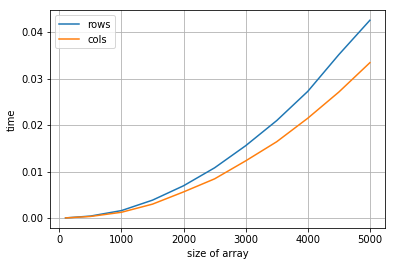

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

dtype = np.int32
trows, tcols = [], []
n_set = [100,500,1000,1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
for n in n_set:
    print (n, end=" ") 
    k = np.zeros ((n,n)).astype(dtype)

    t = %timeit -o -q -r 3 -n 3 k.sum(axis=0)
    trows.append(t.best)

    t = %timeit -o -q -r 3 -n 3 k.sum(axis=1)
    tcols.append(t.best)

plt.plot(n_set, trows, label="rows")
plt.plot(n_set, tcols, label="cols")
plt.xlabel("size of array")
plt.ylabel("time")
plt.grid()
plt.legend()

**Con el almacenamiento recorriendo por filas**

100 500 1000 1500 2000 2500 3000 3500 4000 4500 5000 

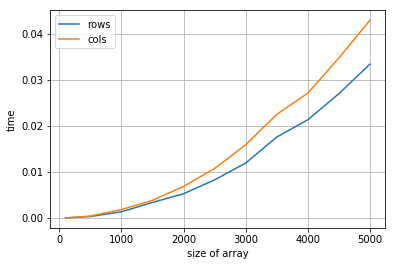

In [43]:
dtype = np.int32
trows, tcols = [], []
n_set = [100,500,1000,1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
for n in n_set:
    print (n, end=" ") 
    k = np.zeros ((n,n)).astype(dtype)
    k = np.asfortranarray(k)

    t = %timeit -o -q -r 3 -n 3 k.sum(axis=0)
    trows.append(t.best)

    t = %timeit -o -q -r 3 -n 3 k.sum(axis=1)
    tcols.append(t.best)

plt.plot(n_set, trows, label="rows")
plt.plot(n_set, tcols, label="cols")
plt.xlabel("size of array")
plt.ylabel("time")
plt.grid()
plt.legend()

### El mismo experimento en C

observa cómo:

- las funciones `ij` y `ji` recorren un array por filas o por columnas usando la aritmética de punteros de C
- medimos los tiempos de ejecución con distintos tamaños de arrays
- escribimos los resultados de tiempos en un fichero de texto
- cargamos el fichero de texto desde Python y pintamos la gráfica.

In [44]:
%%writefile tmp/access_order_example.c
#include <stdlib.h>
#include "rlxutils.h"

void ji(char *arr, long SIZE) {
    long i,j;
    for (j=0; j<SIZE; j++) {
     for (i=0; i<SIZE; i++) {
         arr[i+SIZE*j]++;
     }
    }
}

void ij(char *arr, long SIZE) {
    long i,j;
    for (i=0; i<SIZE; i++) {
       for (j=0; j<SIZE; j++) {
           arr[i+SIZE*j]++;
       }
    }
}

int main(int argc, char **argv) {
    struct timespec tsi, tsf;
    long N = 10;  
    long i,j,k,s;
    double time_diff;

    char *fname = "tmp/Carrays.data";
    printf ("writing to file %s and stdout\n", fname);
    FILE *f = fopen(fname, "w");
    if (f == NULL)
    {
        printf("Error opening file %s\n",fname);
        exit(1);
    }

    double time_ij[N];
    double time_ji[N];

    long sizes[] = {8, 16, 32, 64, 128, 384, 512, 640, 768, 1024, 1536, 2048, 2560,3072, 3584};

    long ssizes = sizeof(sizes)/sizeof(long);
    char *header = "iteration array_size elapsed_time_ij elapsed_time_ji\n";
    printf(    "%s", header);
    fprintf(f, "%s", header);

    for (s=0; s<ssizes; s++) {
      long array_size = sizes[s];
      for (k=0; k<N; k++) {

          char *arr = malloc(array_size*array_size*sizeof(char));
          current_utc_time(&tsi);
          ij(arr, array_size);
          current_utc_time(&tsf);
          time_ij[k] = get_time_diff(tsi, tsf);

          current_utc_time(&tsi);
          ji(arr, array_size);
          current_utc_time(&tsf);
          time_ji[k] = get_time_diff(tsi, tsf);

          free(arr);
      }
      double total_array_size = power(sizes[s],2);
      printf(    "%lu %3.10f %lf %lf\n",s, total_array_size/1024, avg(time_ij, N), avg(time_ji,N));
      fprintf(f, "%lu %3.10f %lf %lf\n",s, total_array_size/1024, avg(time_ij, N), avg(time_ji,N));

    }
    fclose(f);
    return 0; 

}

Writing tmp/access_order_example.c


In [45]:
!make -f files/Makefile-p1.1 clean all

rm -rf *.o tmp/access_order_example /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/*.o
--------------------------------------
- bulding tmp/access_order_example
--------------------------------------
INCLUDES /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
SOURCES tmp/access_order_example.c	 /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/rlxutils.c
ROOT DIR /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
gcc -c -fopenmp -Wno-format -D LINUX -I/home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils tmp/access_order_example.c -o tmp/access_order_example.o
INCLUDES /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils
SOURCES tmp/access_order_example.c	 /home/user/share/Dropbox/teaching/logicIII/p3_20191/student/course_materials/utils/rlxutils.c
ROOT DIR /home/user/share/Dropbox/teaching/logicI

In [46]:
!./tmp/access_order_example

writing to file tmp/Carrays.data and stdout
iteration array_size elapsed_time_ij elapsed_time_ji
0 0.0625000000 0.000000 0.000000
1 0.2500000000 0.000001 0.000001
2 1.0000000000 0.000006 0.000004
3 4.0000000000 0.000023 0.000018
4 16.0000000000 0.000076 0.000069
5 144.0000000000 0.000762 0.000526
6 256.0000000000 0.001239 0.000934
7 400.0000000000 0.002007 0.002135
8 576.0000000000 0.002880 0.002580
9 1024.0000000000 0.007046 0.004025
10 2304.0000000000 0.016151 0.008404
11 4096.0000000000 0.036188 0.015198
12 6400.0000000000 0.062810 0.023911
13 9216.0000000000 0.103112 0.034563
14 12544.0000000000 0.155371 0.044100


In [47]:
import pandas as pd 
df = pd.read_csv("tmp/Carrays.data", sep=" ")

it_number = df['iteration']
x_labels  = df['array_size']

df

,iteration,array_size,elapsed_time_ij,elapsed_time_ji
0,0,0.0625,0.000000,0.000000
1,1,0.2500,0.000001,0.000001
2,2,1.0000,0.000006,0.000004
3,3,4.0000,0.000023,0.000018
4,4,16.0000,0.000076,0.000069
5,5,144.0000,0.000762,0.000526
6,6,256.0000,0.001239,0.000934
7,7,400.0000,0.002007,0.002135
8,8,576.0000,0.002880,0.002580
9,9,1024.0000,0.007046,0.004025


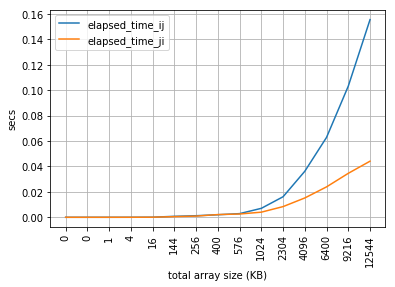

In [48]:
plots = []
legends = []
for k in list(df.keys())[2:]:
    p, = plt.plot(it_number,df[k])
    plots = plots + [p]
    legends = legends+[k]

#plt.set_xticks(it_number)
plt.legend(plots, legends, loc=2)
plt.xticks(it_number, [str(int(i)) for i in x_labels], rotation="vertical")
plt.xlabel("total array size (KB)")
plt.ylabel("secs")
plt.grid()

## Especificación del orden de almacenamiento

Cuando el almacenamiento en memoria de un array es con la con convención de C, se recorren primero las columnas (eje 1) y luego las filas (eje 0). **En este caso se describe con la tupla (1,0)**, indicando qué eje se recorre primero para almacenar en memoria.

In [49]:
a = np.random.randint(100, size=(2,2)).astype(np.int32)
print(get_mempositions(a, relative=True))

[[ 0  4]
 [ 8 12]]


fíjate cómo al recorrer el eje 1 se llena una matriz

In [50]:
a = np.zeros((4,5)).astype(int)
for i in range(a.shape[1]):
    a[0,i] = i
print(a)

[[0 1 2 3 4]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


en cambio cuando se usa la convención de FORTRAN para almacenar en memoria, **el orden es al reves y se describe con la tupla (0,1)** 

In [51]:
a = np.random.randint(100, size=(2,2)).astype(np.int32)
a = np.asfortranarray(a)
print(get_mempositions(a, relative=True))

[[ 0  8]
 [ 4 12]]


fíjate en este caso cómo sucede al recorrer por el eje 0

In [52]:
a = np.zeros((4,5)).astype(int)
for i in range(a.shape[0]):
    a[i,0] = i
print(a)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [2 0 0 0 0]
 [3 0 0 0 0]]


fíjate en el caso de $n=3$ con matrices de tres dimensiones. Con la convención de C, el orden de ejes es **(2,1,0)**

In [53]:
a = np.random.randint(100, size=(2,3,4)).astype(np.int32)
print(get_mempositions(a, relative=True))

[[[ 0  4  8 12]
  [16 20 24 28]
  [32 36 40 44]]

 [[48 52 56 60]
  [64 68 72 76]
  [80 84 88 92]]]


En este caso no es obvio identificar cada eje. Usa el siguiente código para visualizar cual es cada eje


In [54]:
print("eje 0")
a = np.zeros((2,3,4)).astype(int)
for i in range(a.shape[0]):
    a[i,0,0] = i
print(a)

print("\neje 1")
a = np.zeros((2,3,4)).astype(int)
for i in range(a.shape[1]):
    a[0,i,0] = i
print(a)

print("\neje 2")
a = np.zeros((2,3,4)).astype(int)
for i in range(a.shape[2]):
    a[0,0,i] = i
print(a)

eje 0
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]

eje 1
[[[0 0 0 0]
  [1 0 0 0]
  [2 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]

eje 2
[[[0 1 2 3]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


pero con la convención de FORTRAN, el orden es **(0,1,2)**

In [55]:
a = np.random.randint(100, size=(2,3,4)).astype(np.int32)
a = np.asfortranarray(a)
print(get_mempositions(a, relative=True))

[[[ 0 24 48 72]
  [ 8 32 56 80]
  [16 40 64 88]]

 [[ 4 28 52 76]
  [12 36 60 84]
  [20 44 68 92]]]


juega igualmente para entender cual es cada eje como en el ejemplo anterior

### Slicing en Python

Fíjate cómo podemos indexar de manera genérica cualquier estructura de Python a través de objetos `slice` ([ejemplos](https://www.programiz.com/python-programming/methods/built-in/slice))

In [56]:
a = np.random.randint(10, size=(3,10))
a

array([[0, 4, 9, 8, 1, 1, 4, 4, 6, 8],
       [1, 8, 6, 2, 7, 0, 7, 8, 2, 5],
       [5, 5, 6, 1, 7, 0, 5, 8, 4, 6]])

estas dos operaciones son equivalentes

In [57]:
print(a[:, 3:8])
print(a[slice(None, None, None), slice(3,8,None)])

[[8 1 1 4 4]
 [2 7 0 7 8]
 [1 7 0 5 8]]
[[8 1 1 4 4]
 [2 7 0 7 8]
 [1 7 0 5 8]]


 y podemos construir especificaciones de `slices` programáticamente y usarlas como cualquier otra variable

In [59]:
slices = tuple([slice(2,5,None) if i==len(a.shape)-1 else slice(None, None, None)  for i in range(len(a.shape))])
print(a[slices])

[[9 8 1]
 [6 2 7]
 [6 1 7]]


fíjate que la expresión anterior funciona si tenemos más dimensiones

In [60]:
a = np.random.randint(10, size=(2,3,8))
print(a)

[[[2 3 2 5 6 4 8 7]
  [7 7 8 3 0 3 7 5]
  [4 4 0 5 0 5 5 6]]

 [[3 7 2 3 9 3 4 4]
  [3 9 5 4 5 7 0 2]
  [7 2 3 1 2 4 8 9]]]


In [62]:
slices = tuple([slice(2,5,None) if i==len(a.shape)-1 else slice(None, None, None)  for i in range(len(a.shape))])
print(a[slices])

[[[2 5 6]
  [8 3 0]
  [0 5 0]]

 [[2 3 9]
  [5 4 5]
  [3 1 2]]]


# Ejercicios propuestos:

- Determine una fórmula de direccionamiento para representar un arreglo de tres dimensiones en memoria.
- Determina una fórmula de direccionamiento para un arreglo de $n$ dimensiones en memoria.